<a href="https://colab.research.google.com/github/KishanRaj0007/ML-Assignment/blob/main/KMeans_Example_MNNIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example-1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

In [ ]:
X

array([[-4.96938657e+00,  3.53724005e+00],
       [-4.81246011e+00,  5.14500747e+00],
       [-5.02457784e+00,  3.16461048e+00],
       [ 6.42385686e+00, -3.54076191e+00],
       [-6.62888728e+00,  2.31853249e+00],
       [-6.68706136e+00,  3.09425861e+00],
       [-7.39409102e-01,  1.07626303e+01],
       [ 6.31100474e+00, -6.67020069e+00],
       [ 3.21685138e-01,  9.69462806e+00],
       [ 1.84611290e-01,  1.01316564e+01],
       [ 2.09690921e-01,  1.02065003e+01],
       [ 3.59151491e-01,  8.45404202e+00],
       [-5.64775461e+00,  3.83382472e+00],
       [-6.06049855e+00,  2.83328976e+00],
       [-6.35760385e+00,  4.72547889e+00],
       [-6.15384981e+00,  1.85617607e+00],
       [-6.08283166e+00,  4.44970935e+00],
       [ 5.72469417e-01,  9.17315007e+00],
       [-5.37336705e+00,  4.35938585e+00],
       [ 4.55964717e+00, -4.67524612e+00],
       [-1.41835597e+00,  9.50575600e+00],
       [ 5.19947795e+00, -2.78323398e+00],
       [ 1.26332633e+00,  1.12939995e+01],
       [ 9.

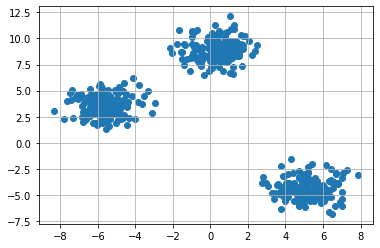

In [ ]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [ ]:
X.shape[1]

2

In [ ]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
	center = 2*(2*np.random.random((X.shape[1],))-1)
	points = []
	cluster = {
		'center' : center,
		'points' : []
	}

	clusters[idx] = cluster

clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

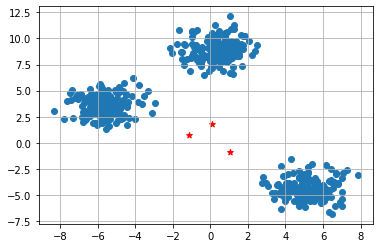

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [ ]:
def distance(p1,p2):
	return np.sqrt(np.sum((p1-p2)**2))


In [ ]:
#Implementing E step
def assign_clusters(X, clusters):
	for idx in range(X.shape[0]):
		dist = []

		curr_x = X[idx]

		for i in range(k):
			dis = distance(curr_x,clusters[i]['center'])
			dist.append(dis)
		curr_cluster = np.argmin(dist)
		clusters[curr_cluster]['points'].append(curr_x)
	return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
	for i in range(k):
		points = np.array(clusters[i]['points'])
		if points.shape[0] > 0:
			new_center = points.mean(axis =0)
			clusters[i]['center'] = new_center

			clusters[i]['points'] = []
	return clusters


In [ ]:
def pred_cluster(X, clusters):
	pred = []
	for i in range(X.shape[0]):
		dist = []
		for j in range(k):
			dist.append(distance(X[i],clusters[j]['center']))
		pred.append(np.argmin(dist))
	return pred


In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


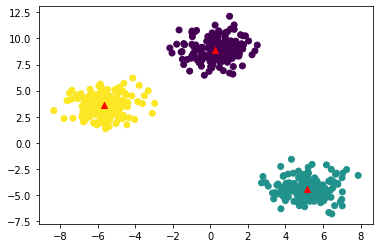

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


Example-2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [ ]:
X, y = load_iris(return_X_y=True)


In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2)
	km.fit(X)
	sse.append(km.inertia_)


In [ ]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.60349881477313,
 34.56651068134763,
 30.378860962566854,
 28.273371410244998,
 26.144519317892907]

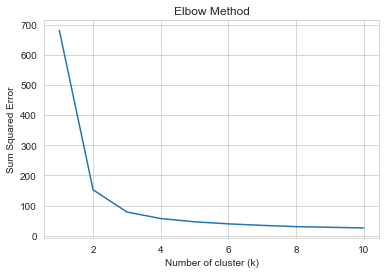

In [ ]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
	ylabel = "Sum Squared Error",
	title ='Elbow Method')

plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=2)

In [ ]:
kmeans.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
pred = kmeans.fit_predict(X)
pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

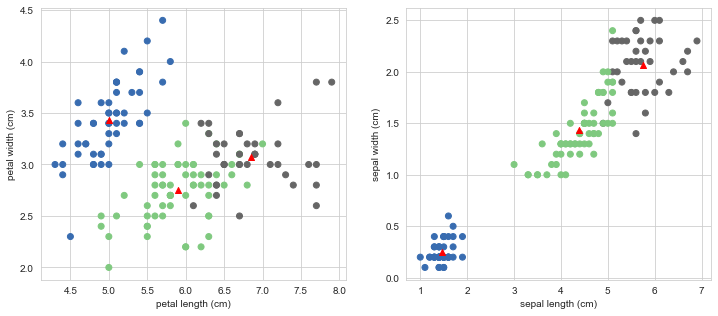

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[:2]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
#################################################################
plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[2:4]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
print("silhouette_score: ", silhouette_score(X, pred))

silhouette_score:  0.5528190123564091


Example-03

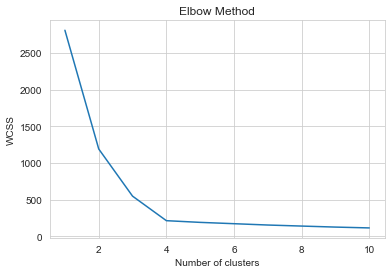

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()